# Imports



Import numpy, matplot and pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

Para iniciar, importar o banco de dados do .zip (utilizando o arquivo de diagnóstico)
https://drive.google.com/file/d/1CcyhsgC5ZtG-CBFsy5giBqjNmBEpu4ej/view?usp=sharing
(deixar no diretório inicial do drive)

In [2]:

drive.mount('/dados_cancer_mama') #access location for Google Drive!

%cd /dados_cancer_mama


import zipfile

def unzip(path, destiny):
  with zipfile.ZipFile(path, 'r') as zip_ref:
      zip_ref.extractall(destiny)


unzip("/dados_cancer_mama/MyDrive/archive.zip", "/dados_cancer_mama/MyDrive/Projeto Estatistica/")
#access to information

Mounted at /dados_cancer_mama
/dados_cancer_mama


Esse trecho realiza as seguintes ações:
*   Utiliza o pandas para ler o banco de dados que foi "unzipado"
*   Limpa dados faltantes
*   Printa tabela






In [5]:

#Reads data from the wdbc.data database that is separated by a comma (sep = ',') and that does not have a header (header = None), (names indicates the name of the columns, they are of the type ID, DIAGNOSTIC, MEDIAS_MEDIDAS, DEVIO_MEDIDAS , BIGGEST_OUTLIERS_MEASUREMENTS)
data = pd.read_csv('/dados_cancer_mama/MyDrive/Projeto Estatistica/wdbc.data', sep=',', header = None, names = ['Id', 'Diagnostic', 'Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area', 'Mean_Smoothness', 'Mean_Compactness', 'Mean_Concavity', 'Mean_Concave_Points', 'Mean_Symmetry', 'Mean_Fractal_Dimension',
                                                                                                                'Radius_SE', 'Texture_SE', 'Perimeter_SE', 'Area_SE', 'Smoothness_SE', 'Compactness_SE', 'Concavity_SE', 'Concave_Points_SE', 'Symmetry_SE', 'Fractal_Dimension_SE',
                                                                                                                'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter', 'Worst_Area', 'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity', 'Worst_Concave_Points', 'Worst_Symmetry', 'Worst_Fractal_Dimension'])


data = data.dropna(axis='rows') # Remove rows with missing data, there is no missing data in this DB
atributes = list(data.columns)


print("Número de linhas e colunas na matriz de atributos:", data.shape) #dados.shape return a tuple (lines, columns)
print(data.shape[0])

data.head(data.shape[0])

Número de linhas e colunas na matriz de atributos: (569, 32)
569


,Id,Diagnostic,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Analise Exploratória dos dados


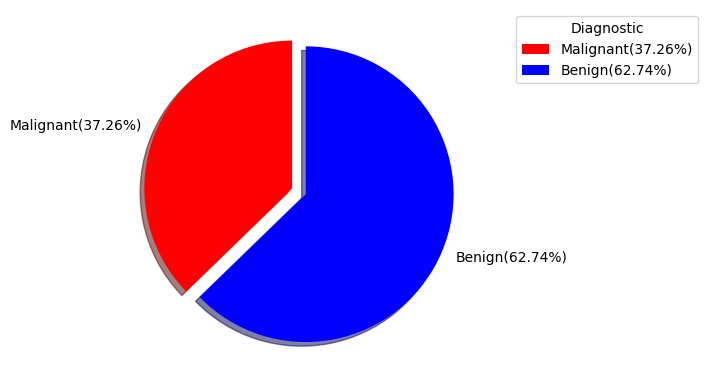

In [ ]:
benig = 0
malig = 0
#counters with numbers of cases of malignant and benign cancer
for diag in data['Diagnostic']:
  if(diag == 'B'):
    benig += 1
  elif(diag == 'M'):
    malig += 1
  else:
    print('error')


vector = np.array([malig, benig])
label = np.array(['{}{:.2f}{}'.format('Malignant(', (malig/data.shape[0])*100, '%)'), '{}{:.2f}{}'.format('Benign(', (benig/data.shape[0])*100, '%)')])
plt.pie(vector, labels = label, colors = ['red', 'blue'], startangle = 90, shadow = True, explode = [0.1, 0])
plt.legend(title = 'Diagnostic', bbox_to_anchor=(1.05, 1))
plt.show()



In [ ]:
#Print hist graphs functions
def print_hist_graph(data, atributes, type):
  colors = ['red', 'blue', 'yellow', 'green', 'cyan', 'magenta', 'black', 'purple', 'orange']

  if type == 'mean':
    title = 'Mean for each exam'
    ref = 3
  elif type == 'standard_error':
    title = 'Standard error for each exam'
    ref = 13
  else:
    title = 'Worst case for each exam'
    ref = 23

  fig, graph = plt.subplots(3,3, figsize =(30,12))
  plt.suptitle(title)
  c = 0

  for i in range(0,3):
    for j in range (0,3):
      graph[i , j].hist(data[atributes[ref]], bins=150, color= colors[c]) #bin -> partitions on x axis
      graph[i , j].set_title(atributes[ref], x = 0.5)
      ref = ref + 1
      c += 1



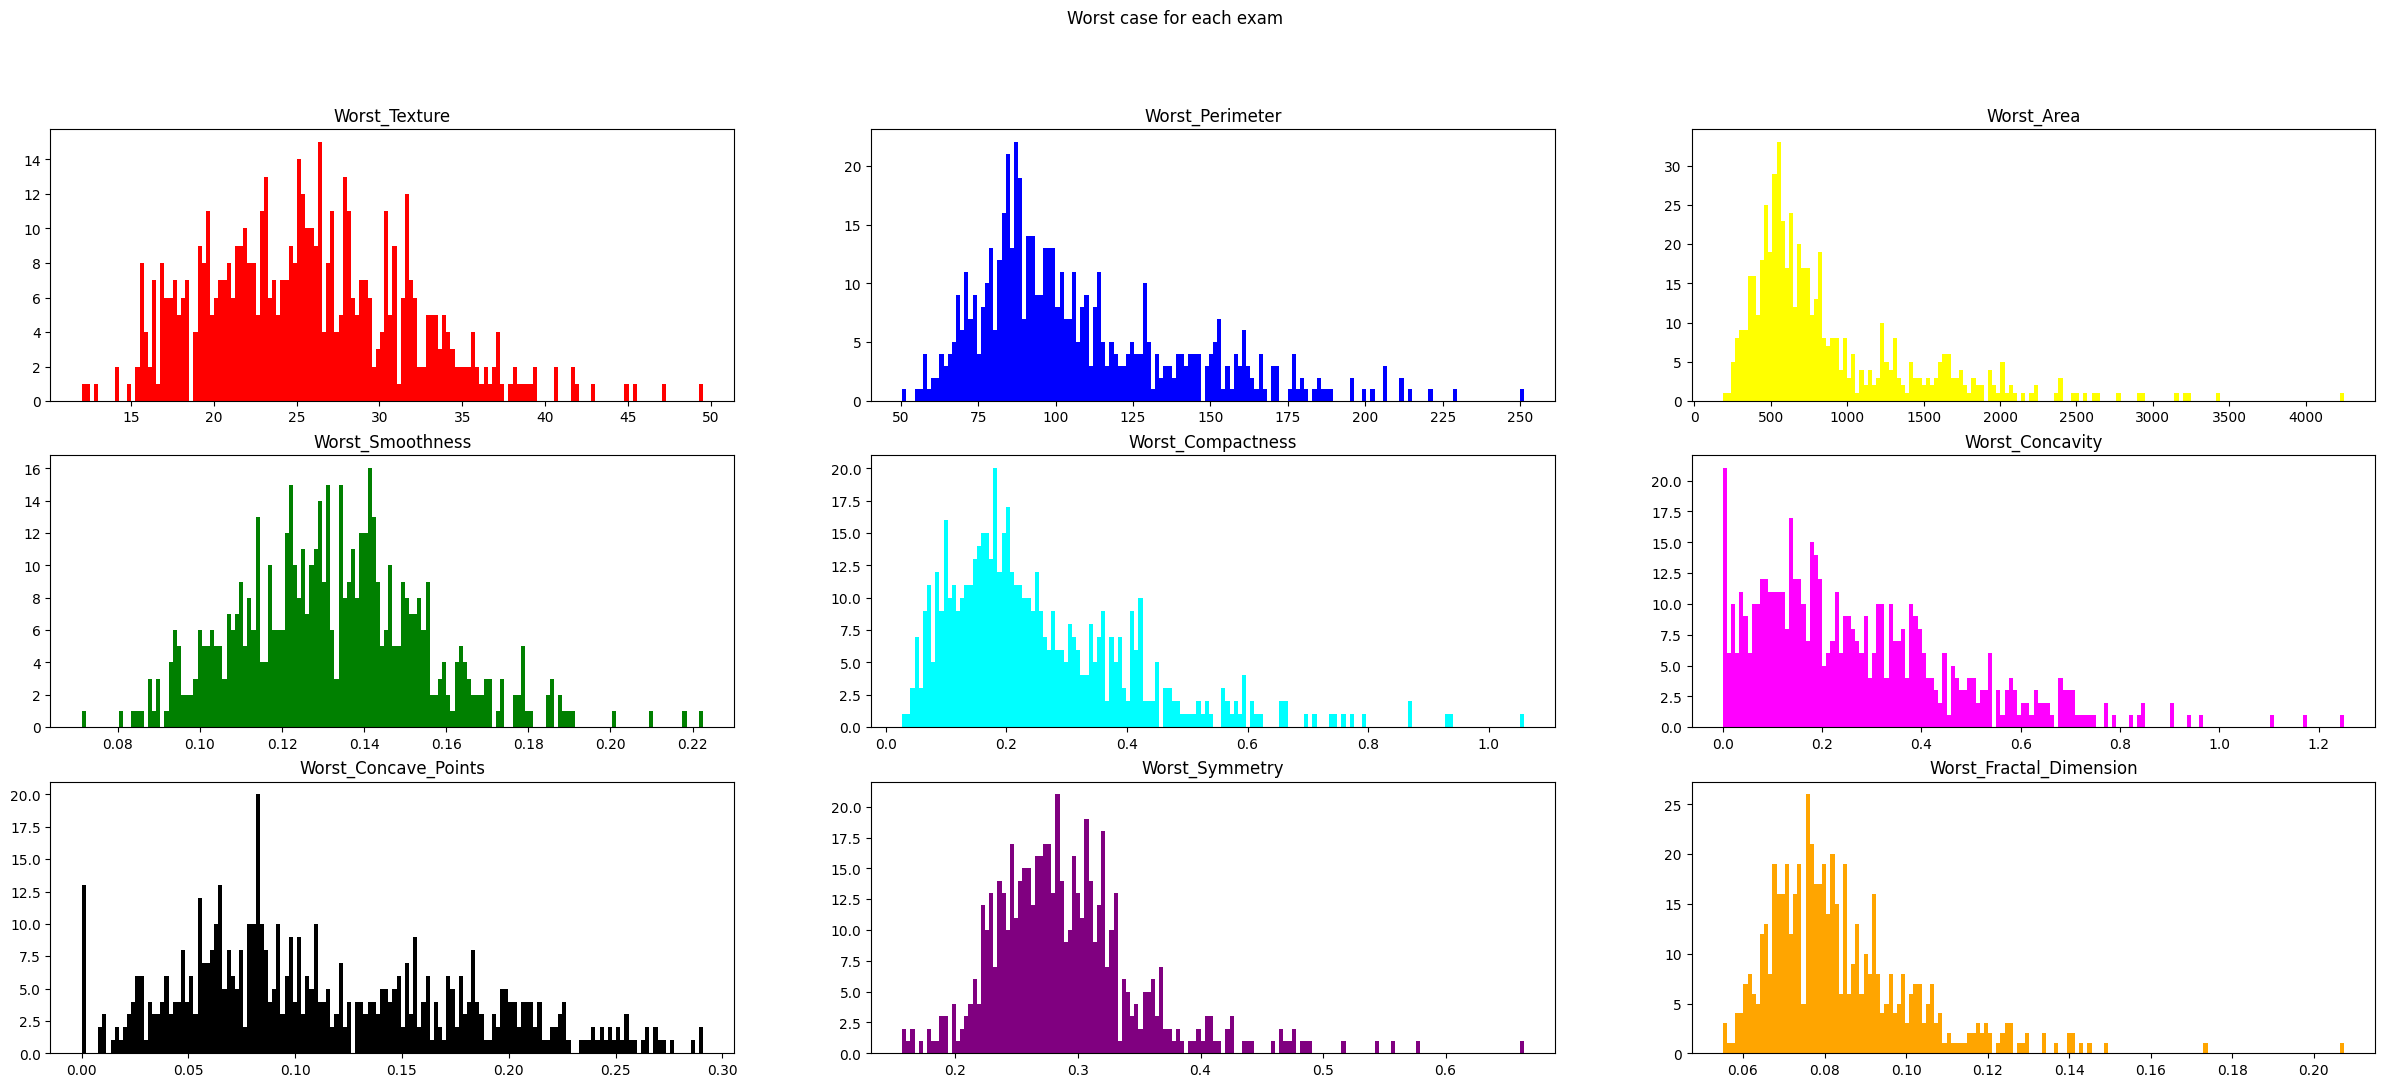

In [ ]:
print_hist_graph(data, atributes, 'worst')
#Print on screen the graphs (worst case)

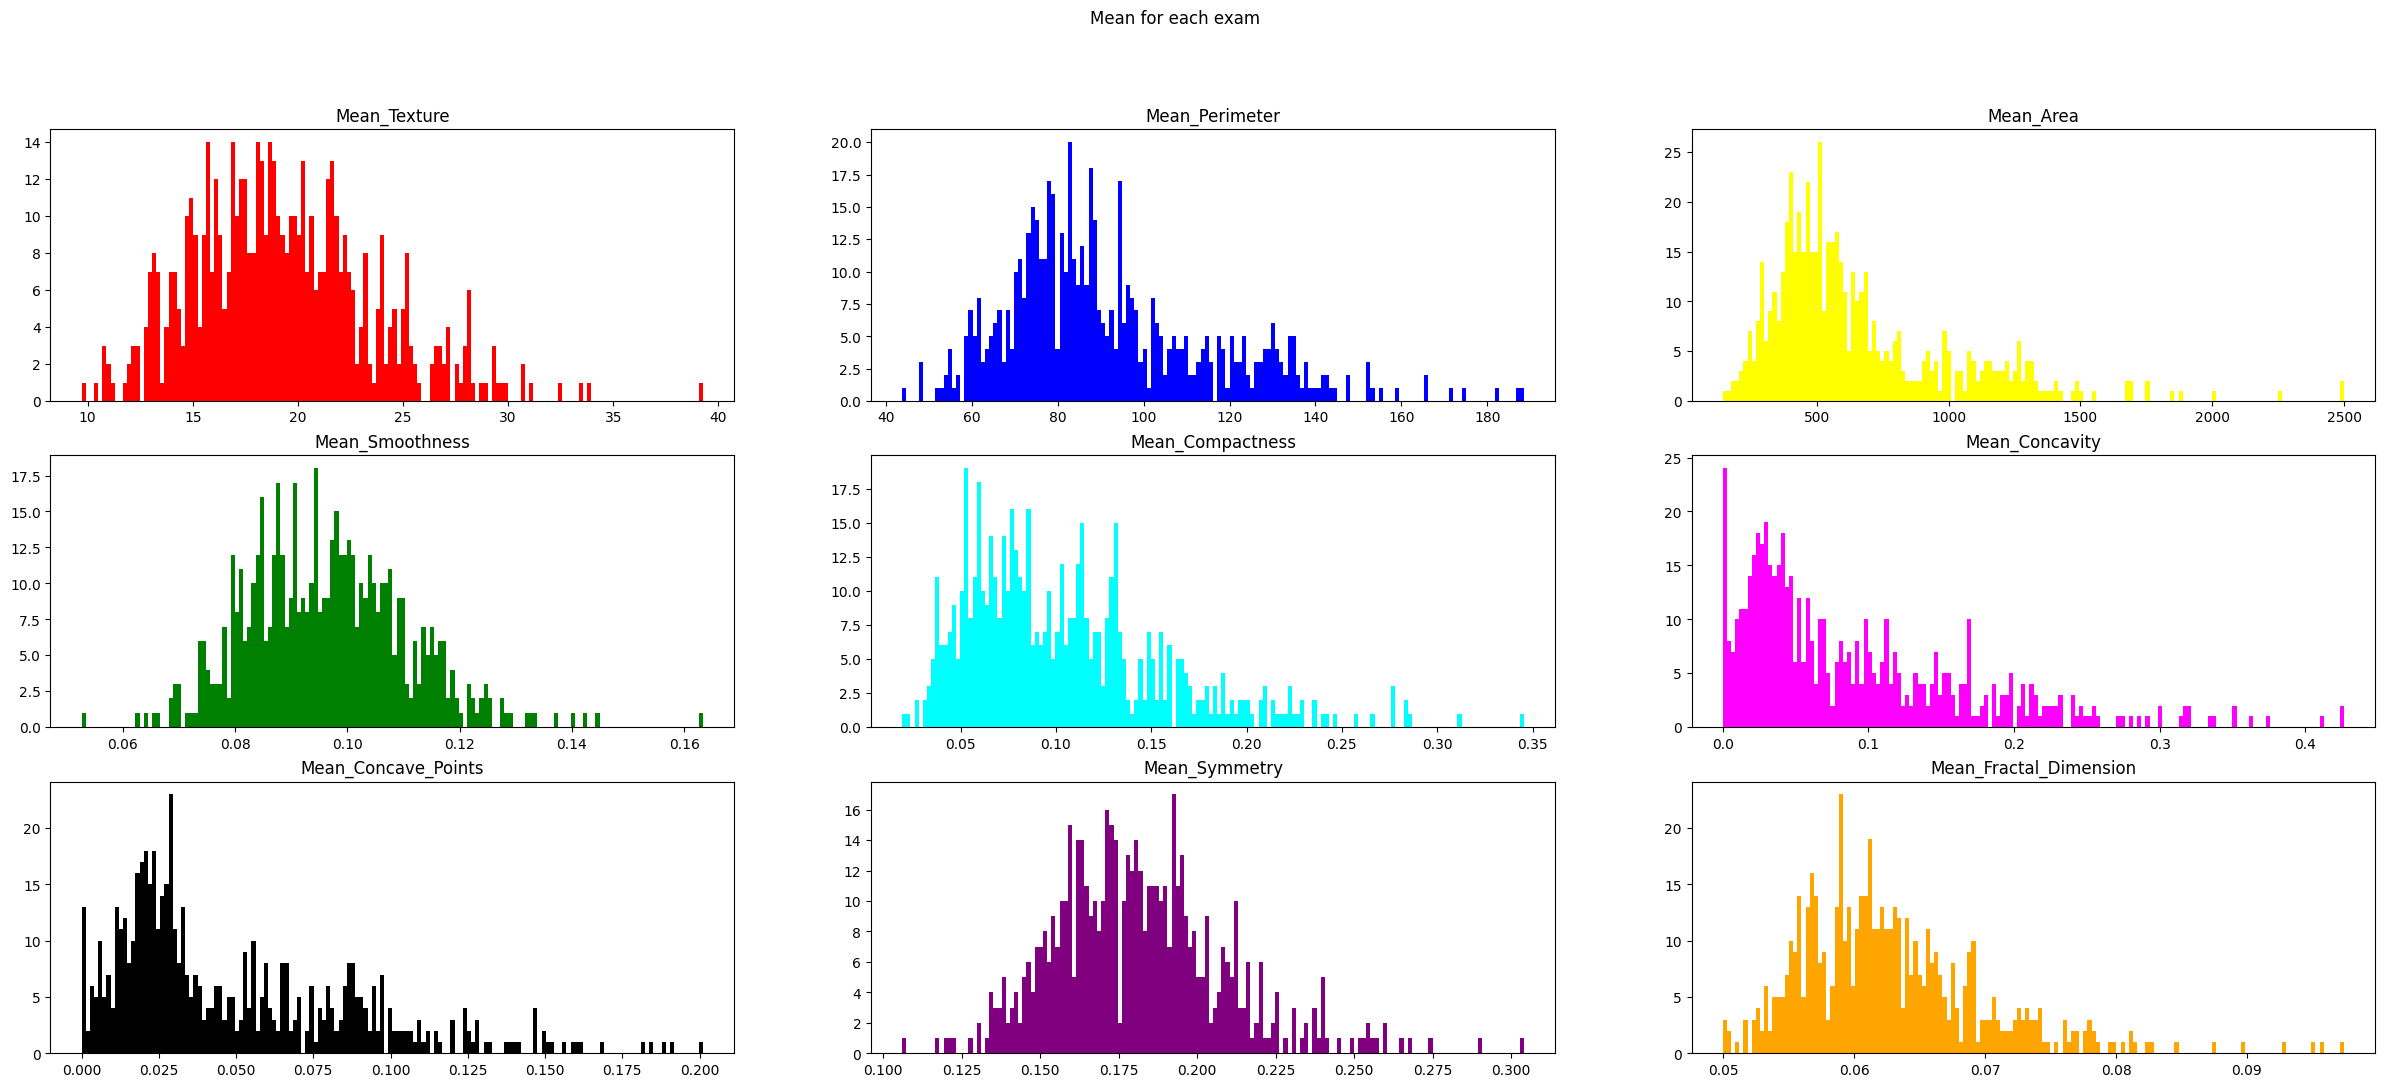

In [ ]:
print_hist_graph(data, atributes, 'mean')
#Print on screen the graphs (Means)

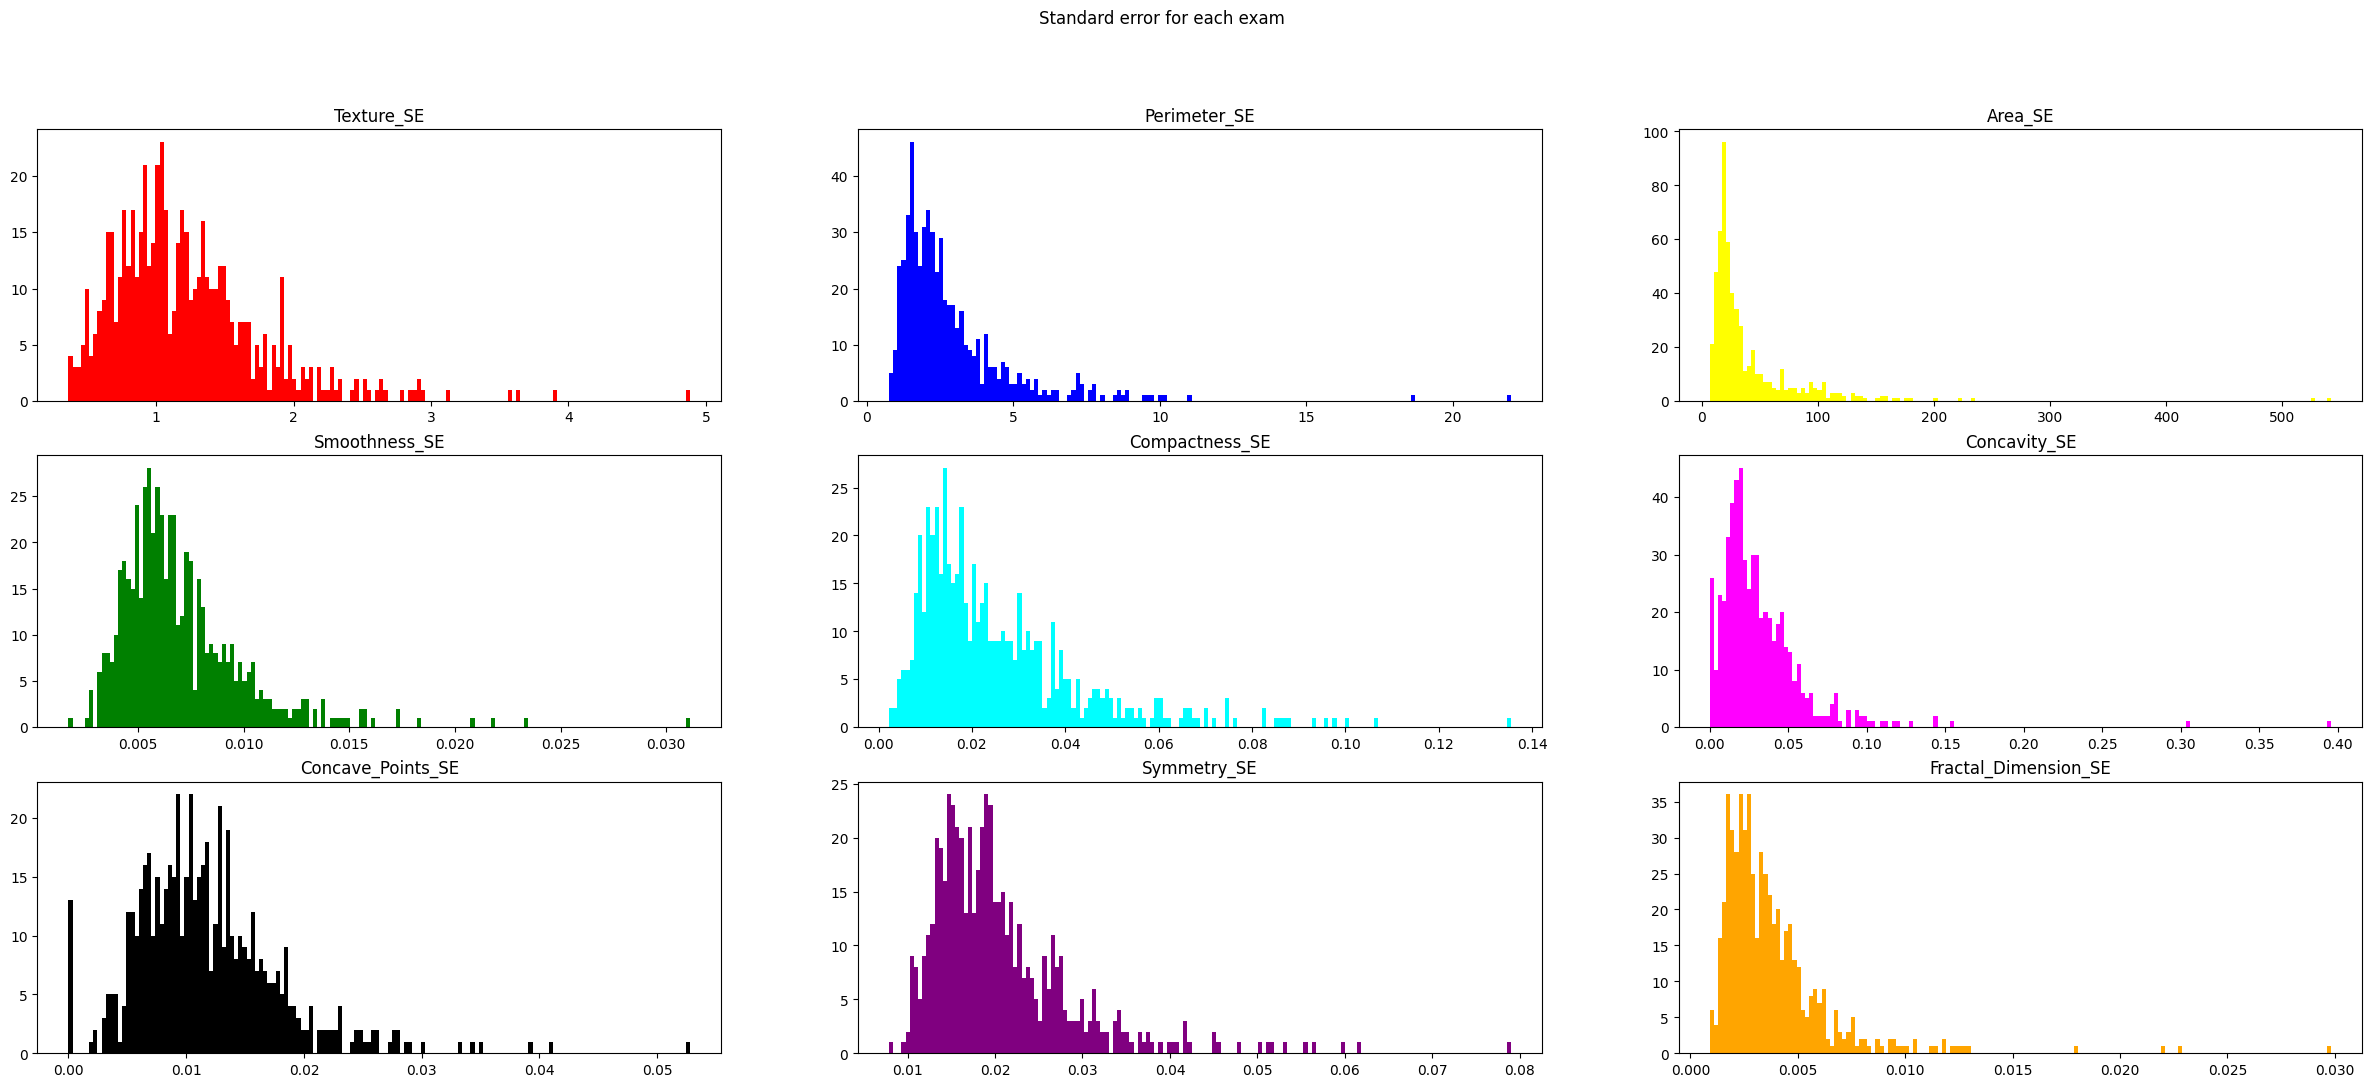

In [ ]:
print_hist_graph(data, atributes, 'standard_error')
#Print on screen the graphs (SE)

In [ ]:
means = {
        mean_texture:
        mean_radius:
        mean_symmetry:
        mean_concave_points:
        mean_fractal_dimension:

      }